# Kid's Drawings
We were given data from children's drawings in which they try to draw a shape that is presented to them.
We will try to create algorithms that predict several questions:
* 1. Number of lines
* 2. Line length and average pressure
* 3. Number of pen levels
* 4. Is the shape closed or open


### Imports

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib
import matplotlib.pyplot as plt
import math 
import warnings
warnings.filterwarnings('ignore')

#### Collect all the pictures into list of Dataframes

In [2]:
dfs = []
for i in range(1,22):
    dfs.append(pd.read_csv('C:\\Users\\Shlomit\\Desktop\\Data-Science-project-2\\drawings pandas\\train\\7554\\SimpleTest\\' + str(i) + '.csv'))

In [3]:
for df in dfs:
    df[' Time'] = pd.to_datetime(df[' Time'])

In [4]:
dfs[0]

,X,Y,Pressure,TiltX,TiltY,Time
0,925.902760133965,665.541979,0.045884,-4917.0,669.0,2022-06-13 00:12:36
1,925.902760133965,665.541979,0.045884,-4917.0,669.0,2022-06-13 00:12:37
2,926.692689687031,665.647303,0.082506,-4917.0,669.0,2022-06-13 00:12:38
3,927.008661508257,665.647303,0.115953,-4917.0,669.0,2022-06-13 00:12:39
4,927.324633329484,665.594641,0.140368,-4917.0,669.0,2022-06-13 00:12:41
...,...,...,...,...,...,...
129,584.863841090195,646.846980,0.386954,-4510.0,1946.0,2022-06-13 00:14:03
130,584.653193209377,646.741656,0.386954,-4501.0,1991.0,2022-06-13 00:14:04
131,584.653193209377,646.741656,0.389151,-4501.0,1991.0,2022-06-13 00:14:05
132,Time Elapsed till drawing started: 00:11.2234987,NaN,NaN,NaN,NaN,NaT


In [5]:
dfs[0][' Time'][0].second

36

#### Convert columns names

In [6]:
for i in range(21):
    dfs[i] = dfs[i].rename({' Y':'Y',' Pressure':'Pressure',' TiltX':'TiltX',' TiltY':'TiltY',' Time':'Time'},axis=1)

In [7]:
dfs[0].columns


Index(['X', 'Y', 'Pressure', 'TiltX', 'TiltY', 'Time'], dtype='object')

#### Drop the last two rows
We have no use for them


In [8]:
for i in range(21):
    dfs[i].drop(dfs[i].tail(2).index,inplace=True) 

#### Change X colmun to float

In [9]:
for i in range(21):
    dfs[i].X=dfs[i].X.astype("float")


In [10]:
dfs[11].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 0 to 526
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   X         527 non-null    float64       
 1   Y         527 non-null    float64       
 2   Pressure  527 non-null    float64       
 3   TiltX     527 non-null    float64       
 4   TiltY     527 non-null    float64       
 5   Time      527 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 28.8 KB


In [11]:
dfs[0]

,X,Y,Pressure,TiltX,TiltY,Time
0,925.902760,665.541979,0.045884,-4917.0,669.0,2022-06-13 00:12:36
1,925.902760,665.541979,0.045884,-4917.0,669.0,2022-06-13 00:12:37
2,926.692690,665.647303,0.082506,-4917.0,669.0,2022-06-13 00:12:38
3,927.008662,665.647303,0.115953,-4917.0,669.0,2022-06-13 00:12:39
4,927.324633,665.594641,0.140368,-4917.0,669.0,2022-06-13 00:12:41
...,...,...,...,...,...,...
127,585.495785,647.004966,0.378408,-4510.0,1946.0,2022-06-13 00:14:01
128,584.863841,646.846980,0.382803,-4510.0,1946.0,2022-06-13 00:14:02
129,584.863841,646.846980,0.386954,-4510.0,1946.0,2022-06-13 00:14:03
130,584.653193,646.741656,0.386954,-4501.0,1991.0,2022-06-13 00:14:04


#### Plot some photos

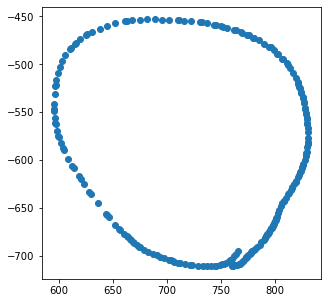

In [13]:
plt.figure (figsize = (5,5))
plt.plot(dfs[2]['X'],-dfs[2]['Y'],'o')
ax = plt.gca()


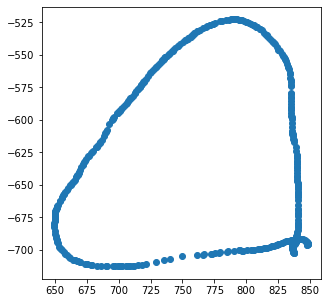

In [14]:
plt.figure (figsize = (5,5))
plt.plot(dfs[3]['X'],-dfs[3]['Y'],'o')
ax = plt.gca()

## Add new colmun
We decided to make a new column of the distance between each point and the one after it.
This column will help us later


In [191]:
def distance(x1,x2,y1,y2):
    return math.sqrt(pow(x1-x2,2)+pow(y1-y2,2))

In [192]:
for df in dfs:
    dist=[]
    for i in range(0,len(df)-1):
        dist.append(distance(df.loc[i]['X'],df.loc[i+1 ]['X'],df.loc[i]['Y'],df.loc[i+1]['Y']))
    dist.append(0)
    df['distance']=dist

### Question 3 - Hands lifted
First, answer question 3 because we have used it in other questions

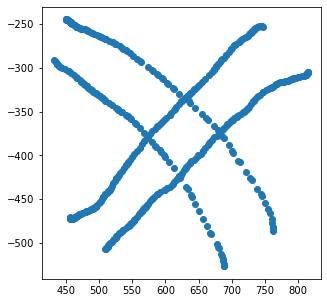

In [17]:
plt.figure (figsize = (5,5))
plt.plot(dfs[11]['X'],-dfs[11]['Y'],'o', marker='o')
ax = plt.gca()

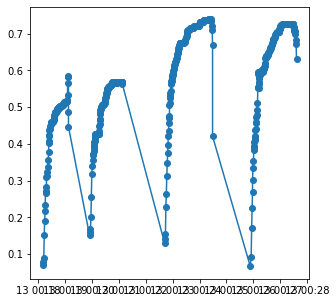

In [18]:
plt.figure (figsize = (5,5))
plt.plot(dfs[11]['Time'],dfs[11]['Pressure'],'-o')

From the graph above, it can be seen that we have jumped when the pen pressure changes "drastically", we will count them.


## The function of hands lift
The function counts hands lift when the pressure between points is more than 0.25 or there is a large distance between points and the one after it. The last hands lift of finish the draw doesn't count

In [205]:
def liftHandCount(df):
    count = 0
    for i in range (0 ,len(df['Pressure'])-1):
        if abs(df.loc[i,'Pressure']-df.loc[i+1,'Pressure'])>0.25:
            count += 1
        elif df.loc[i,'distance']>30:
            count += 1
    return count   

### Sample visualization


In [263]:
def liftHandCountVis(df):
    index=[]
    for i in range (0 ,len(df['Pressure'])-1):
        if abs(df.loc[i,'Pressure']-df.loc[i+1,'Pressure'])>0.25:
            index.append(i)
        elif df.loc[i,'distance']>30:
            index.append(i)
    return index  

In [297]:
print(liftHandCount(dfs[6]))

9


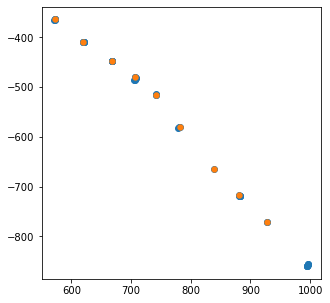

In [267]:
liftsHand=liftHandCountVis(dfs[6])
plt.figure(figsize=(5,5))
plt.plot(dfs[6]['X'], -dfs[6]['Y'], 'o')

plt.plot(dfs[6]['X'][liftsHand], -dfs[6]['Y'][liftsHand], 'o', mew=0.3)

We can see there is 9 hands lift

In [298]:
print(liftHandCount(dfs[4]))

2


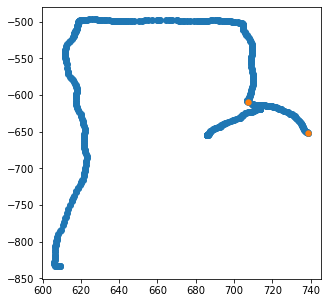

In [299]:
liftsHand=liftHandCountVis(dfs[4])
plt.figure(figsize=(5,5))
plt.plot(dfs[4]['X'], -dfs[4]['Y'], 'o')

plt.plot(dfs[4]['X'][liftsHand], -dfs[4]['Y'][liftsHand], 'o', mew=0.3)

## Question 1 - Lines counting

### The function of Counting lines
We looked at the whole Dataframe and noticed that when we have a continuation of the X line of all the dots it is an ascending or descending series. Likewise the Y.
Conversely, when we have a new line, the way the series changes, if the series went up then it starts going down and if it went down it starts going up.
In addition, each line lift is considered the beginning of a new line.
When creating a list of points at the beginning of a new line it can be seen that we have several points always in a sequence, we treated them as a block. It's mean as the beginning of one line

In [237]:
def linesCount(df):
    count = 0
    index = []
    if df.loc[0 , 'X'] < df.loc[1 , 'X']:
        direct_x = 1
    else :
        direct_x = -1
    if df.loc[0 , 'Y'] < df.loc[1 , 'Y']:
          direct_y = 1
    else:
          direct_y = -1
            
    for i in range (1,len(df['Y'])-1):
        if df.loc[i , 'X'] > df.loc[i+1 , 'X'] and direct_x == 1 and df.loc[i , 'Y'] > df.loc[i+1 , 'Y'] and direct_y == 1:
                direct_x = -1
                direct_y = -1
                index.append(i)
            
        elif df.loc[i , 'X'] < df.loc[i+1 , 'X'] and direct_x == 1 and df.loc[i , 'Y'] < df.loc[i+1 , 'Y'] and direct_y == -1:
            direct_x = -1
            direct_y = 1
            index.append(i)
            
        elif df.loc[i , 'X'] > df.loc[i+1 , 'X'] and direct_x == -1 and df.loc[i , 'Y'] > df.loc[i+1 , 'Y'] and direct_y == 1:
            direct_x = 1
            direct_y = -1 
            index.append(i)
        
        elif df.loc[i , 'X'] < df.loc[i+1 , 'X'] and direct_x == -1 and df.loc[i , 'Y'] < df.loc[i+1 , 'Y'] and direct_y == -1:
                direct_x = 1
                direct_y = 1
                index.append(i)
                        
        elif df.loc[i , 'X'] > df.loc[i+1 , 'X'] and direct_x == 1:
                direct_x = -1
                index.append(i)

        elif df.loc[i , 'X'] < df.loc[i+1 , 'X'] and direct_x == -1:
                direct_x = 1
                index.append(i)
                
        elif df.loc[i , 'Y'] > df.loc[i+1 , 'Y'] and direct_y == 1:
                direct_y = -1
                index.append(i)
                
        elif df.loc[i , 'Y'] < df.loc[i+1 , 'Y'] and direct_y == -1:
                direct_y = 1
                index.append(i)
            
    count_index=1
    for i in range (0,(len(index)-1)):
        if index[i]+40 < index[i+1]:
            count_index+=1
    
    if count_index<liftHandCount(df):
        return liftHandCount(df)
    
    return count_index    

### Sample visualization


In [279]:
linesCount(dfs[10])

6

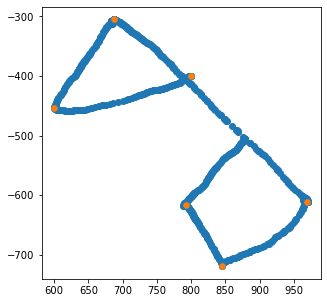

In [280]:
linesCountStart=linesCountReturnList(dfs[10])
plt.figure(figsize=(5,5))
plt.plot(dfs[10]['X'], -dfs[10]['Y'], 'o')

plt.plot(dfs[10]['X'][linesCountStart], -dfs[10]['Y'][linesCountStart], 'o', mew=0.5)

In [282]:
linesCount(dfs[11])

4

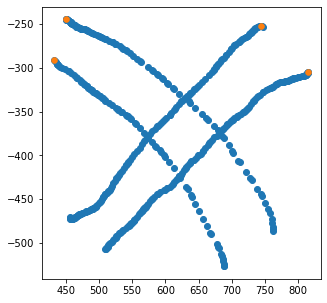

In [283]:
linesCountStart=linesCountReturnList(dfs[11])
plt.figure(figsize=(5,5))
plt.plot(dfs[11]['X'], -dfs[11]['Y'], 'o')

plt.plot(dfs[11]['X'][linesCountStart], -dfs[11]['Y'][linesCountStart], 'o', mew=0.5)

## Question 2 - Calculate the length of the line & the average pressure

### The help function of Calculate the length of the line
We did a similar auxiliary function that counts the number of lines only that it returns the indexes where each line begins. In order to know where each line begins.


In [92]:
def linesCountReturnList(df):
    count = 0
    index = []
    if df.loc[0 , 'X'] < df.loc[1 , 'X']:
        direct_x = 1
    else :
        direct_x = -1
    if df.loc[0 , 'Y'] < df.loc[1 , 'Y']:
          direct_y = 1
    else:
          direct_y = -1
    for i in range (1,len(df['Y'])-1):
        if df.loc[i , 'X'] > df.loc[i+1 , 'X'] and direct_x == 1 and df.loc[i , 'Y'] > df.loc[i+1 , 'Y'] and direct_y == 1:
                direct_x = -1
                direct_y = -1
                index.append(i)
            
        elif df.loc[i , 'X'] < df.loc[i+1 , 'X'] and direct_x == 1 and df.loc[i , 'Y'] < df.loc[i+1 , 'Y'] and direct_y == -1:
            direct_x = -1
            direct_y = 1
            index.append(i)
            
        elif df.loc[i , 'X'] > df.loc[i+1 , 'X'] and direct_x == -1 and df.loc[i , 'Y'] > df.loc[i+1 , 'Y'] and direct_y == 1:
            direct_x = 1
            direct_y = -1 
            index.append(i)
            
        elif df.loc[i , 'X'] < df.loc[i+1 , 'X'] and direct_x == -1 and df.loc[i , 'Y'] < df.loc[i+1 , 'Y'] and direct_y == -1:
                direct_x = 1
                direct_y = 1
                index.append(i)
                        
        elif df.loc[i , 'X'] > df.loc[i+1 , 'X'] and direct_x == 1:
                direct_x = -1
                index.append(i)

        elif df.loc[i , 'X'] < df.loc[i+1 , 'X'] and direct_x == -1:
                direct_x = 1
                index.append(i)
                
        elif df.loc[i , 'Y'] > df.loc[i+1 , 'Y'] and direct_y == 1:
                direct_y = -1
                index.append(i)
                
        elif df.loc[i , 'Y'] < df.loc[i+1 , 'Y'] and direct_y == -1:
                direct_y = 1
                index.append(i)

    startLines=[index[0]]
    for i in range (0,(len(index)-1)):
        if index[i]+40 < index[i+1]:
            startLines.append(index[i+1])
            
    return startLines    

In [284]:
linesCountReturnList(dfs[10])


[1, 199, 332, 483, 578, 677]

### The function of Calculate the length of the line
Once we have received the list of indexes we will run on the Dataframe and sum up all the distances between points

In [162]:
def linesLength(df):
    lines=linesCountReturnList(df)
    sum=0
    for j in range (0,lines[1]):
            sum += df.loc[j]['distance']
    print('The length of line',1,'is:',sum)
        
    for i in range (1,len(lines)-1):
        sum=0
        for j in range (lines[i],lines[i+1]):
            sum += df.loc[j]['distance']
        print('The length of line',i+1,'is',sum)
     
    sum=0
    for j in range (lines[len(lines)-1],len(df)-1):
            sum += df.loc[j]['distance']
    print('The length of line',len(lines),' is: ',sum)

In [178]:
linesLength(dfs[10])

The length of line 1 is: 422.6469914290229
The length of line 2 is 182.48986120957457
The length of line 3 is 223.6840807221298
The length of line 4 is 442.2714035911501
The length of line 5 is 116.04066440002829
The length of line 6  is:  150.308952781483


### The function of Calculate the the average pressure
Once we have the length of the line we will run on the Dataframe and sum up the pressures and divide by the number of rows


In [182]:
def linesPressureAverage(df):
    lines=linesCountReturnList(df)
    count=0
    sum=0
    for j in range (0,lines[1]):
        count+=1
        sum += df.loc[j]['Pressure']
    print('The average pressure of line',1,'is:',sum/count)
        
    for i in range (1,len(lines)-1):
        count=0
        sum=0
        for j in range (lines[i],lines[i+1]):
            count+=1
            sum += df.loc[j]['Pressure']
        print('The average pressure of line',i+1,'is',sum/count)
    count=0 
    sum=0
    for j in range (lines[len(lines)-1],len(df)-1):
        count+=1
        sum += df.loc[j]['Pressure']
    print('The average pressure of line',len(lines),'is:',sum/count)

In [183]:
linesPressureAverage(dfs[10])

The average pressure of line 1 is: 0.7995869270970474
The average pressure of line 2 is 0.5295687162114265
The average pressure of line 3 is 0.6801272498456058
The average pressure of line 4 is 0.5730275103920385
The average pressure of line 5 is 0.5808806071678797
The average pressure of line 6 is: 0.6615718515175912


### Question 4 - Shapes is closed or open

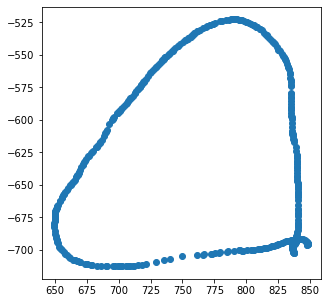

In [186]:
plt.figure (figsize = (5,5))
plt.plot(dfs[3]['X'],-dfs[3]['Y'],'o')
ax = plt.gca()

In [189]:
pd.set_option('display.max_rows', None)

dfs[6]

,X,Y,Pressure,TiltX,TiltY,Time,distance
0,571.329715,364.894792,0.190661,-3352.0,2845.0,2022-06-13 00:02:14,0.659853
1,571.908996,364.578820,0.202380,-3352.0,2845.0,2022-06-13 00:02:15,1.212370
2,572.909574,363.894214,0.237781,-3352.0,2845.0,2022-06-13 00:02:16,0.223426
3,573.067560,363.736228,0.239979,-3352.0,2845.0,2022-06-13 00:02:17,0.000000
4,573.067560,363.736228,0.230701,-3352.0,2845.0,2022-06-13 00:02:17,65.540313
5,619.778727,409.710128,0.260487,-4405.0,2788.0,2022-06-13 00:03:01,0.595802
6,620.200023,409.288832,0.276600,-4405.0,2788.0,2022-06-13 00:03:02,0.000000
7,620.200023,409.288832,0.268055,-4276.0,2682.0,2022-06-13 00:03:03,0.000000
8,620.200023,409.288832,0.277577,-4102.0,2544.0,2022-06-13 00:03:04,0.000000
9,620.200023,409.288832,0.282460,-4102.0,2544.0,2022-06-13 00:03:05,0.569626


In [ ]:
def closeOrOpen(df):
    